In [7]:
import yfinance as yf
import xalpha as xa
import akshare as ak

d:\src\portfolio-cal\.venv\lib\site-packages\akshare\__init__.py:2986: UserWarning: 为了支持更多特性，请将 Pandas 升级到 2.2.0 及以上版本！
  warnings.warn(


In [30]:
#peb = xa.toolbox.PEBHistory("399006")
#index = yf.Ticker("399006.SZ")
#index.info
#stock = ak.stock_index_pe_lg("创业板50")
stock = ak.stock_market_pe_lg("上证")

In [31]:
stock

,日期,指数,平均市盈率
0,1999-01-29,1134.67,34.03
1,1999-02-09,1090.08,33.50
2,1999-03-31,1158.05,34.30
3,1999-04-30,1120.92,34.39
4,1999-05-31,1279.32,35.30
...,...,...,...
308,2024-08-30,2842.21,12.16
309,2024-09-30,3336.50,14.24
310,2024-10-31,3279.82,13.90
311,2024-11-29,3326.46,14.08


In [65]:
"""
Cell generated by Data Wrangler.
"""
import pandas as pd

def clean_data(stock):
    # Add a column for 5 years moving average
    stock['5yrs_moving_avg'] = stock['平均市盈率'].rolling(window=60).mean()  # 60 days moving average
    stock['10yrs_moving_avg'] = stock['平均市盈率'].rolling(window=120).mean()  # 120 days moving average
    # Calculate the percentile of 静态市盈率
    stock['percentile'] = stock['平均市盈率'].rank(pct=True) * 100
    stock['5yrs_percentile'] = stock['平均市盈率'].rolling(window=5*252).rank(pct=True) * 100
    stock['10yrs_percentile'] = stock['平均市盈率'].rolling(window=10*252).rank(pct=True) * 100
    # Assign result back to stock
    #stock = pd.DataFrame({'Answer': percentile})
    # change 日期 as datetime as set as index
    stock['日期'] = pd.to_datetime(stock['日期'])
    stock.set_index('日期', inplace=True)    
    return stock

stock_clean = clean_data(stock.copy())
stock_clean.tail()

,指数,平均市盈率,5yrs_moving_avg,10yrs_moving_avg,percentile,5yrs_percentile,10yrs_percentile
日期,,,,,,,
2024-08-30,2842.21,12.16,14.348333,15.145500,10.223642,NaN,NaN
2024-09-30,3336.50,14.24,14.353500,15.165833,29.392971,NaN,NaN
2024-10-31,3279.82,13.90,14.356667,15.172167,24.920128,NaN,NaN
2024-11-29,3326.46,14.08,14.348833,15.156250,27.156550,NaN,NaN
2024-12-31,3351.76,14.23,14.345833,15.142000,28.913738,NaN,NaN


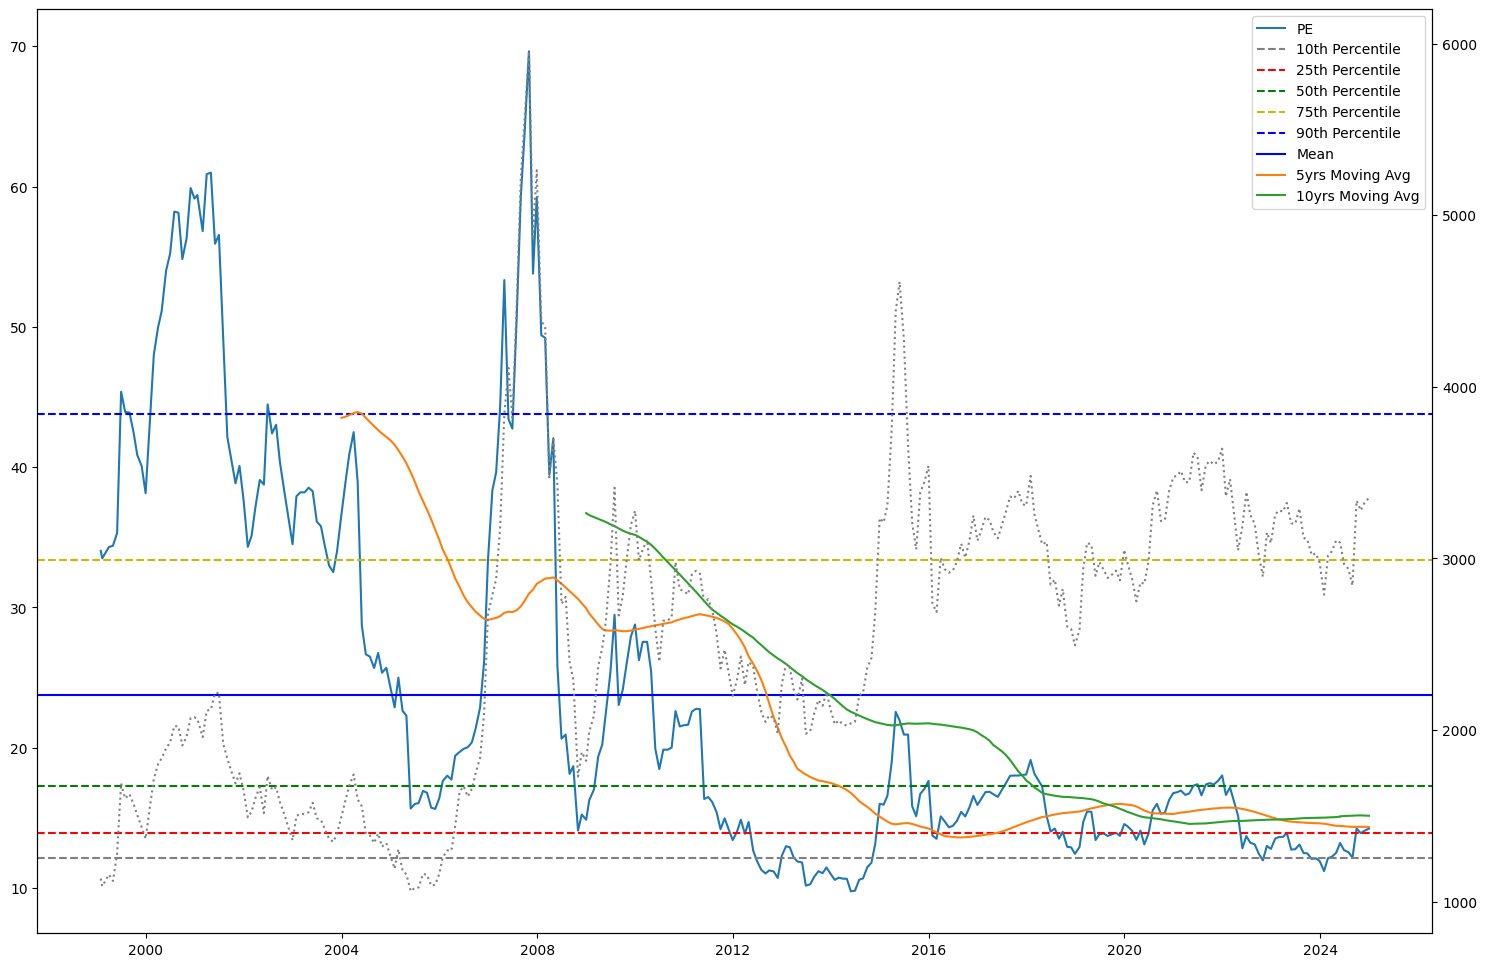

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))

# Plot the normalized data
plt.plot(stock_clean.index, stock_clean['平均市盈率'], label='PE')
plt.axhline(y=stock_clean['平均市盈率'].quantile(0.10), color='gray', linestyle='--', label='10th Percentile')
plt.axhline(y=stock_clean['平均市盈率'].quantile(0.25), color='r', linestyle='--', label='25th Percentile')
plt.axhline(y=stock_clean['平均市盈率'].quantile(0.50), color='g', linestyle='--', label='50th Percentile')
plt.axhline(y=stock_clean['平均市盈率'].quantile(0.75), color='y', linestyle='--', label='75th Percentile')
plt.axhline(y=stock_clean['平均市盈率'].quantile(0.90), color='b', linestyle='--', label='90th Percentile')
plt.axhline(y=stock_clean['平均市盈率'].mean(), color='b', linestyle='-', label='Mean')
plt.plot(stock_clean.index, stock_clean['5yrs_moving_avg'], label='5yrs Moving Avg')
plt.plot(stock_clean.index, stock_clean['10yrs_moving_avg'], label='10yrs Moving Avg')
plt.legend(loc='best')

# Create a secondary y-axis for the original values
ax2 = plt.gca().twinx()
ax2.plot(stock_clean.index, stock_clean['指数'], label='Index (Original)', linestyle=':', color='gray')

# Add legends

#ax2.legend(loc='best')

plt.show()
